In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [27]:
from scipy.stats import laplace 

# зададим случайную величину по закону Лапласа


#параметры распределения
a, b = 4.32, 3.18
rv = laplace(a, b) 

# сгенерируем 1000 значений
sample = rv.rvs(1000) 


#проверка распределения
print (rv.mean())
print (rv.std())


4.32
4.497199128346442


Text(0.5, 0, '$x$')

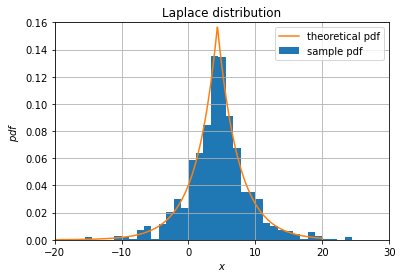

In [40]:
#гистограмма выборки

plt.hist(sample, bins=40,  density=True, label='sample pdf')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

#теоретическая плотность распределения
x = np.linspace(-20,20,1000)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()

plt.grid()
plt.axis([-20, 30, 0, 0.16])
plt.title('Laplace distribution')
plt.ylabel('$pdf$')
plt.xlabel('$x$')



In [47]:
#количество выборок
num = 1000

#объём выборок
volume = [5, 10, 50]

#массив из нулей под выборочное среднее значение
distributionsamples = np.zeros( (len(volume), num) )

#вычисление выборочных средних значений, запись в массив
for i in range(len(volume)):
    for j in range(num):
        distributionSampleTemp = np.array( sts.laplace.rvs(a,b, size=volume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionsamples[i, j] = distributionSampleTempMean
        
print (distributionsamples)

[[ 4.67766193  3.48029558  3.71965404 ... -1.15960555  4.52827245
   4.51600839]
 [ 6.84396248  0.99844239  4.23614451 ...  6.18682594  0.14480864
   0.98868699]
 [ 5.53324297  6.12611742  4.56952415 ...  3.33580799  5.01841074
   4.28298406]]


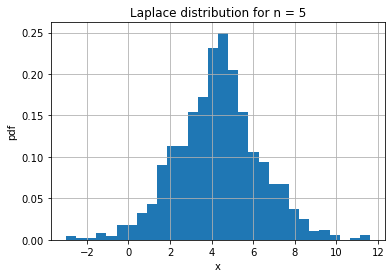

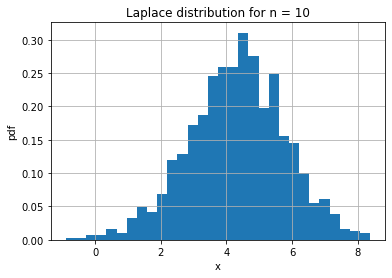

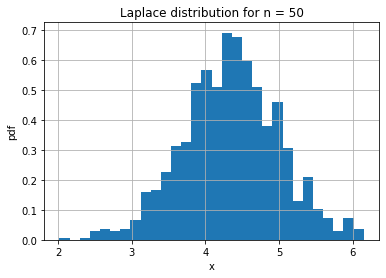

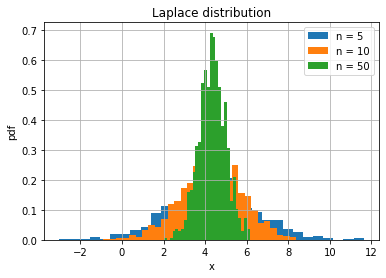

In [53]:
#гистограммы выборки

for i in range( len(volume) ):
    plt.hist(distributionsamples[i], bins=30, density=True)
    plt.grid()
  #  plt.axis([-20, 30, 0, 0.16])
    plt.title('Laplace distribution for n = ' + str(volume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range( len(volume) ):
    plt.hist(distributionsamples[i], bins=30, density=True, label='n = ' + str(volume[i]))
    plt.grid()
   # plt.axis([-20, 30, 0, 0.16])
    plt.title('Laplace distribution')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

In [78]:
#Математическое ожидание и дисперсия

mean = rv.mean()
print ('Математическое ожидание: ' + str(mean))
print (num)
print (volume)

for i in range(len(volume)):
    print(i)##  3
    for j in range(num):## 1000
        distributionSample = np.array( sts.laplace.rvs(a,b, size=volume[i]) )
        distributionSampleMean = distributionSample.mean()
    print (distributionSample)
        


#print ('Дисперсия для n = 5: ' + str(distributionSample))
# distributionSampleVariance[i] = rv.var(distributionsamples)
#('Дисперсия для n = ' + str(5) + ': ' + str(distributionSampleVariance))

#distributionsamples = np.zeros( (5, num) )
#distributionSampleVariance[i] = rv.var(distributionsamples)
#('Дисперсия для n = ' + str(volume[i]) + ': ' + str(distributionSampleVariance[i]))

#distributionsamples = np.zeros( (5, num) )
#distributionSampleVariance[i] = rv.var(distributionsamples)
#('Дисперсия для n = ' + str(volume[i]) + ': ' + str(distributionSampleVariance[i]))


#distributionsamples = np.zeros( (len(volume), num) )
#for i in range( len(volume) ):
#    distributionSampleVariance[i] = rv.var()
#    #distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / volume[i]
    

#for i in range(len(volume)):
  #  print ('Дисперсия для n = ' + str(volume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 4.32
1000
[5, 10, 50]
0
[-6.11367257  4.07713428  7.50641495  3.44039535  4.83425955]
1
[-4.56775306  7.95728384  7.60676509  2.68994586  8.40282121 14.96369839
  6.3761831   4.88939362  4.48625766  5.60946908]
2
[ -3.60756773   6.38259897  21.48884991   2.72780709  10.03530914
   3.30664481  14.74676629  10.24695719   2.23446086   0.13434143
  -3.80138643  12.60369408  -1.47364151   2.18627356   9.71753625
   2.26882463  13.61379247 -11.7529382    4.67205567   4.71022255
  -5.59198277   9.78579943  -2.48889742  -1.31168165   3.93225008
   1.33885918  -1.37927775   4.88933536   8.08871985   3.03932517
  -6.37200213   9.08190226 -10.27618383   7.06565762   7.28361472
   3.38340371  -9.73447238   7.8588892    4.9120706   -5.69330321
   2.76240197   6.49281832   1.69221654   5.75676202  11.8682224
   0.87124288   3.83468906   8.53236604   8.08172204   2.90330495]


In [80]:
# зададим случайную величину по закону двойного распределения Вейбулла

#параметры распределения
k = 4.0
xm = 3.0

#frozen distribution
distributionRv = sts.pareto(k, loc=0, scale=xm)

# сгенерируем 1000 значений
distributionSample = distributionRv.rvs(1000)




#количество выборок
sampleNum = 1000

#массив объёма выборок
sampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
#Математическое ожидание и дисперсия

distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in range( len(sampleVolume) ):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / sampleVolume[i]
    
print('Математическое ожидание: ' + str(distributionSampleMean))
for i in range( len(sampleVolume) ):
    print ('Дисперсия для n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i]))

Математическое ожидание: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04
